In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('headbrain.csv')


In [3]:
print(data.shape)
data.head

(237, 4)


<bound method NDFrame.head of      Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0         1          1             4512                 1530
1         1          1             3738                 1297
2         1          1             4261                 1335
3         1          1             3777                 1282
4         1          1             4177                 1590
..      ...        ...              ...                  ...
232       2          2             3214                 1110
233       2          2             3394                 1215
234       2          2             3233                 1104
235       2          2             3352                 1170
236       2          2             3391                 1120

[237 rows x 4 columns]>

In [5]:
#collecting x and y
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [9]:
#mean of x and y
mean_x = np.mean(X)
mean_y= np.mean(Y)

#total no. of vaalues
n=len(X)

#using formula to calculate slope , c - b1, b0
num=0
den=0

for i in range(n):
    num+=(X[i]-mean_x)*(Y[i]-mean_y)
    den+=(X[i]-mean_x)**2

b1=num/den
b0=mean_y -(b1*mean_x)

print(b1,b0)


0.26342933948939945 325.57342104944223


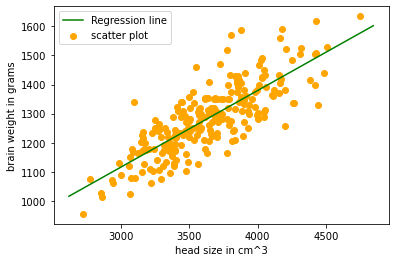

In [15]:
#plotting values and regresssion line
max_x= np.max(X) +100
min_x = np.min(X) -100

#calculating x and y line values
x= np.linspace(min_x,max_x,1000)
y=b0 + b1*x

plt.plot(x,y,color='green',label='Regression line')
plt.scatter(X,Y,c='orange',label='scatter plot')

plt.xlabel('head size in cm^3')
plt.ylabel('brain weight in grams')

plt.legend()
plt.show()

In [18]:
#r squre method
nume=0
deno=0

for i in range(n):
    y_pred = b0 + b1*X[i]
    nume +=(Y[i]-y_pred)**2
    deno+=(Y[i]-mean_y)**2
    
r2=1- (nume/deno)
print(r2)
    

0.6393117199570003


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 metrics in scikit learn
X=X.reshape((n,1))

#creating model
reg=LinearRegression()
#fitting trainning model
reg=reg.fit(X,Y)
#y prediction
y_pred = reg.predict(X)

#calculate r2 score

r2_score = reg.score(X,Y)

print(r2_score)

0.639311719957
